**Topic modeling on the CoAID dataset:**

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the datasets
files = ['NewsFakeCOVID-19_05-01-2020.csv', 'NewsFakeCOVID-19_07-01-2020.csv', 'NewsFakeCOVID-19_09-01-2020.csv', 'NewsFakeCOVID-19_11-01-2020.csv']
dataframes = [pd.read_csv(file) for file in files]

In [32]:
# Extract 'title' columns
titles = [df['title'] for df in dataframes]

# Combine all titles into a single series
all_titles = pd.concat(titles).dropna().reset_index(drop=True)

In [33]:
# Create a CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the titles
X = vectorizer.fit_transform(all_titles)

In [34]:
# Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(X)

LatentDirichletAllocation(random_state=0)

In [35]:
# Function to display top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(" ".join(top_words))

# Get feature names and display topics
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words=10)

Topic 1:
19 covid coronavirus flu fauci dr gates anthony vaccine claims
Topic 2:
coronavirus president trump covid 19 donald new people stimulus state
Topic 3:
19 covid coronavirus masks novel president health vaccine cases hydroxychloroquine
Topic 4:
covid coronavirus 19 says pandemic people cases masks facebook video
Topic 5:
coronavirus covid 19 people flu virus novel use says times
Topic 6:
covid 19 coronavirus mask pandemic positive virus test tested trump
Topic 7:
coronavirus virus people president says government end cure pandemic released
Topic 8:
coronavirus novel face masks media shows social china people claims
Topic 9:
coronavirus covid 19 people lab trump dying children hours says
Topic 10:
coronavirus 19 covid says china pandemic outbreak virus states new


**Results of topic modeling on the CoAID dataset:**

Since this dataset is specific to content related to the covid pandemic, most of the topics mentioned here are closely related to the pandemic, mostly about the disease itself, and its surroundings like opinions from doctors, the president of the US at that time, vaccines, China etc.

**Topic Modeling on the LIAR dataset**

Please note that the dataset has been modified to add relevant column headers to the data.

Topic 0: says, marriage, percent, sex, dont, obama, gay, republican, congress, state
Topic 1: jobs, created, 000, sector, says, lost, wage, minimum, private, million
Topic 2: percent, state, billion, says, budget, new, states, years, spending, office
Topic 3: says, rick, planned, perry, parenthood, abortion, health, women, rubio, marco
Topic 4: health, care, says, percent, insurance, people, year, 000, million, law
Topic 5: says, states, state, school, rate, obama, paul, united, funding, highest
Topic 6: says, obama, percent, illegal, immigrants, president, state, years, barack, tax
Topic 7: says, obama, said, president, debt, romney, clinton, gun, states, mitt
Topic 8: says, states, united, crist, obama, taxes, world, charlie, voted, change
Topic 9: tax, says, taxes, 000, percent, middle, class, cuts, schools, cut


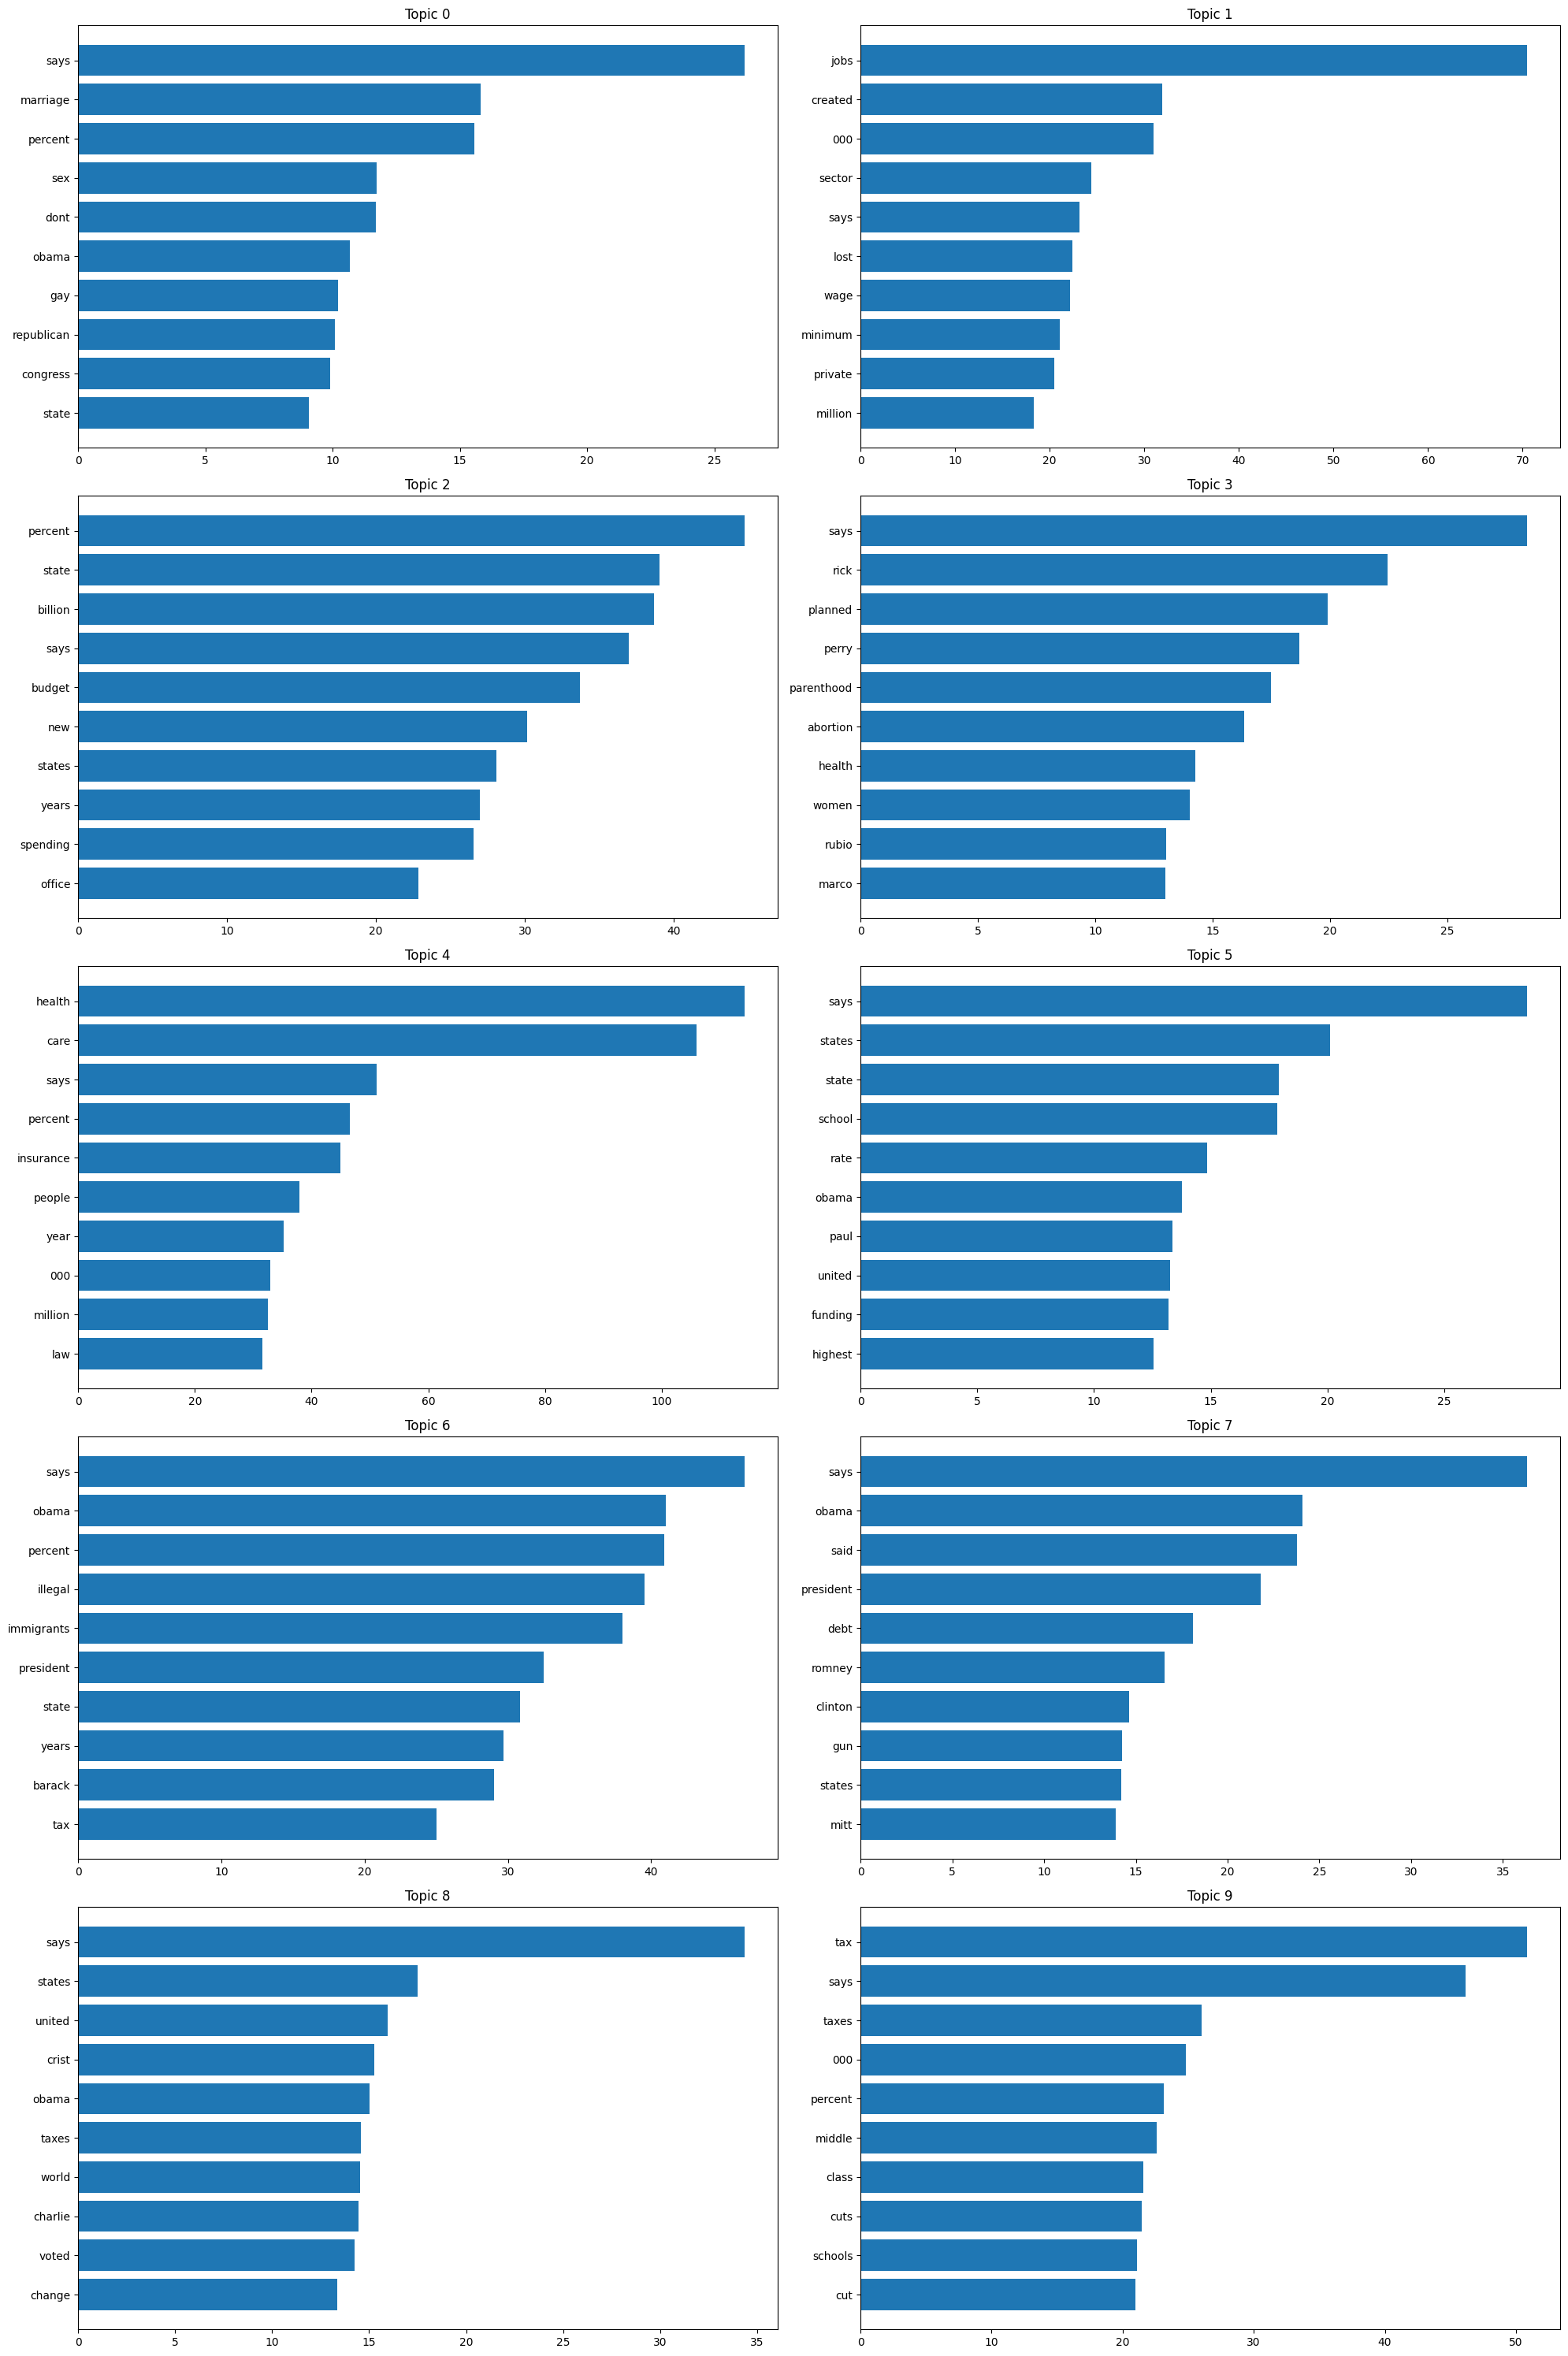

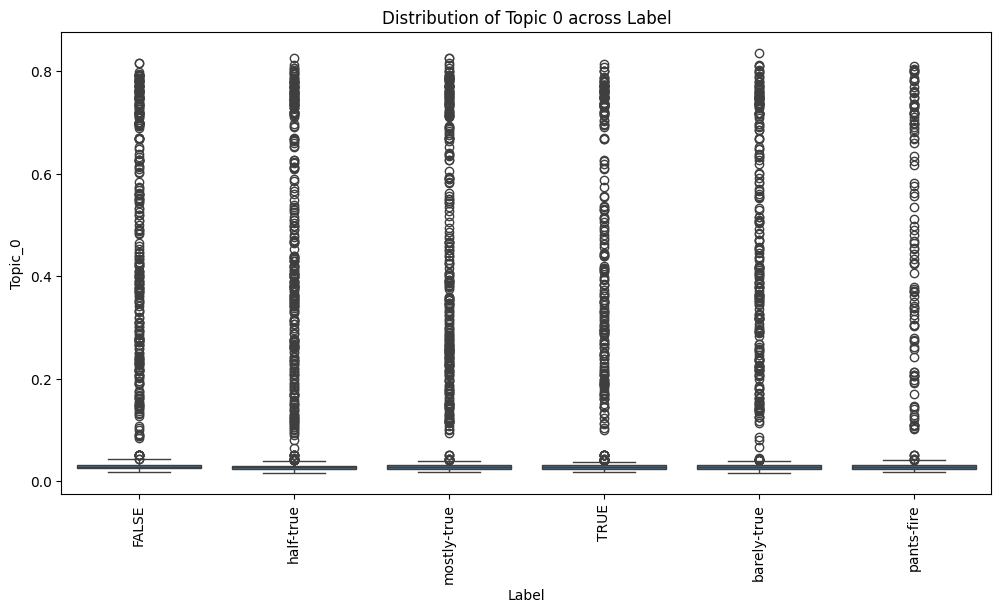

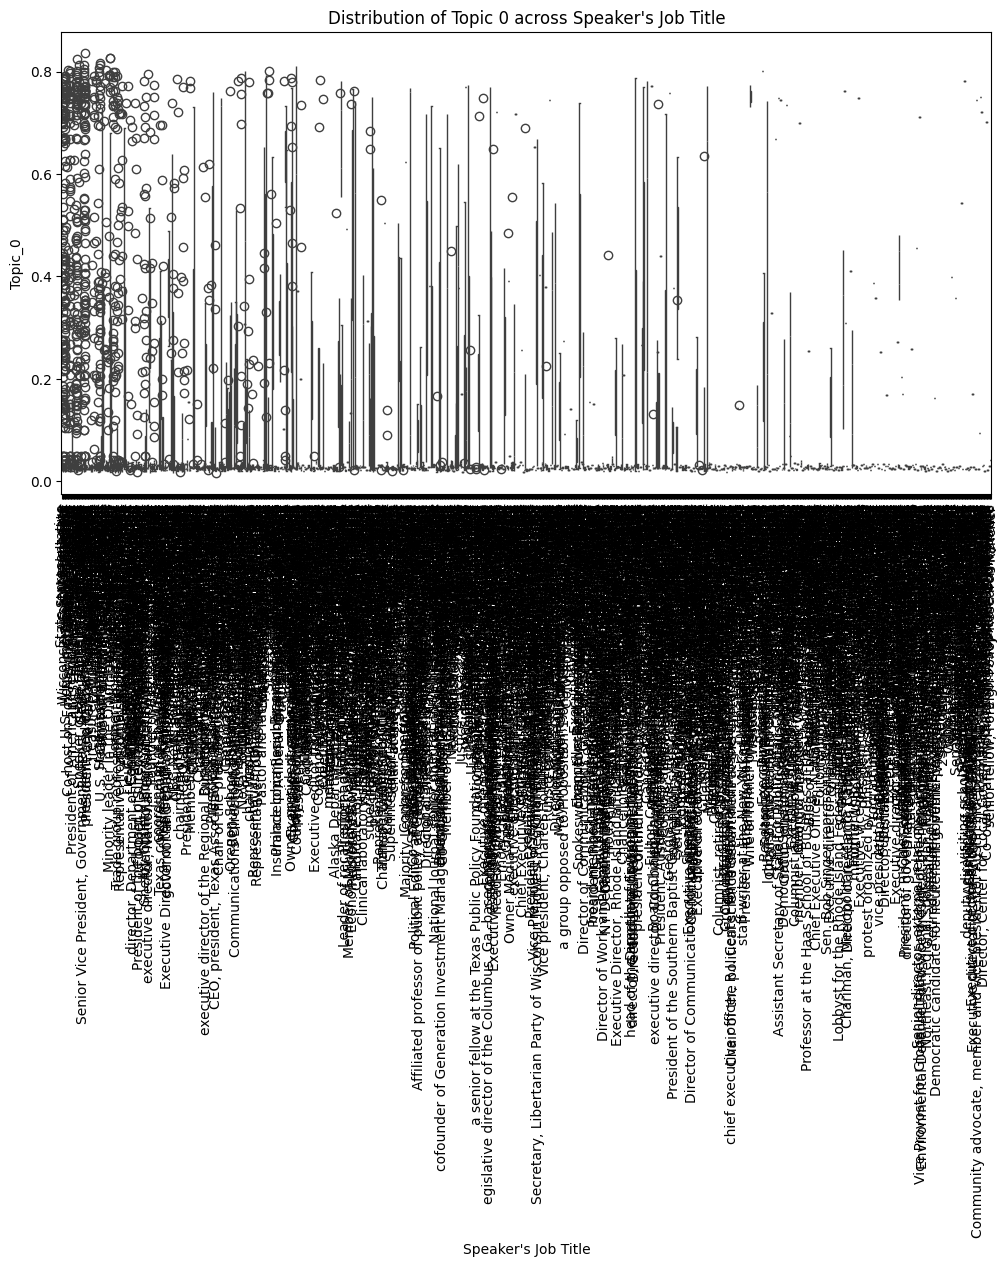

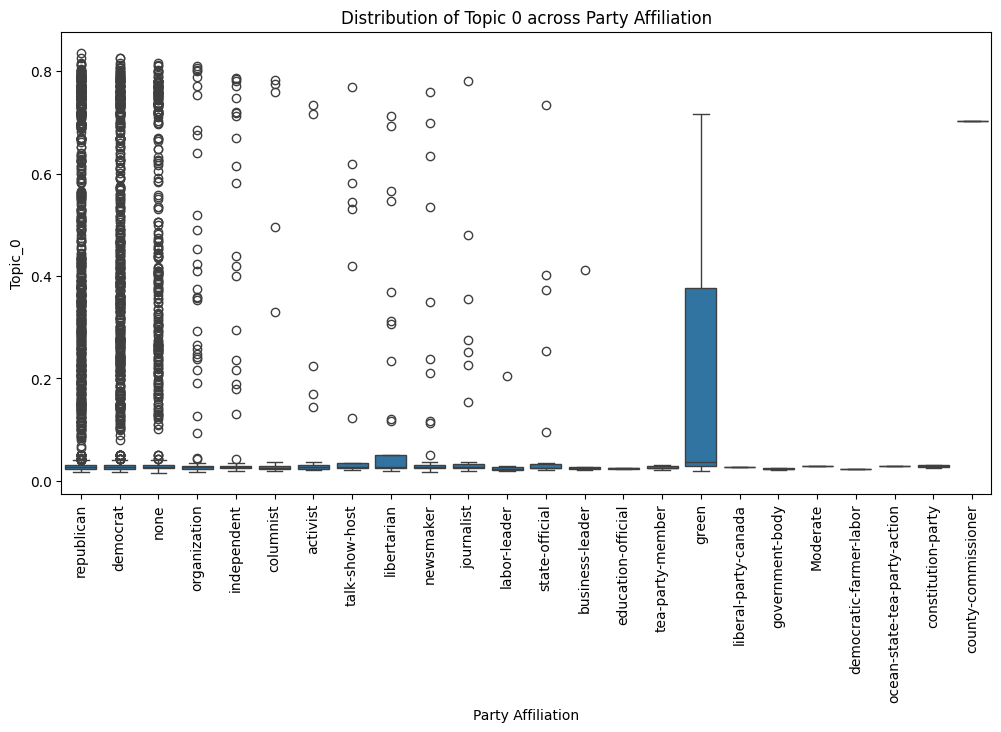

Label
half-true      0.206744
FALSE          0.195012
mostly-true    0.191449
TRUE           0.163726
barely-true    0.162162
pants-fire     0.080907
Name: proportion, dtype: float64
Party Affiliation
republican                      0.440504
democrat                        0.325250
none                            0.170187
organization                    0.021382
independent                     0.013994
newsmaker                       0.004954
journalist                      0.004085
libertarian                     0.003911
columnist                       0.003651
activist                        0.003564
talk-show-host                  0.002521
state-official                  0.002086
labor-leader                    0.000956
business-leader                 0.000869
tea-party-member                0.000869
green                           0.000261
education-official              0.000174
government-body                 0.000174
constitution-party              0.000174
liberal-party-canada

In [42]:
# Install required packages
# !pip install pandas scikit-learn matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Load the datasets
train_df = pd.read_csv('train-extended - train.csv')
test_df = pd.read_csv('test-extended - test.csv')

# Combine datasets for analysis
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Preprocess the text data
text_data = combined_df['Statement'].dropna().values

# Vectorize the data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(text_data)

# Fit LDA model
n_topics = 10  # Number of topics
lda = LDA(n_components=n_topics, random_state=42)
lda.fit(X)

# Get the topic words
def get_topic_words(model, vectorizer, n_words=10):
    word_idx = vectorizer.get_feature_names_out()
    topic_words = {}
    for idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-n_words:][::-1]
        topic_words[f'Topic {idx}'] = [word_idx[i] for i in top_words_idx]
    return topic_words

# Display the topics
topic_words = get_topic_words(lda, vectorizer)
for topic, words in topic_words.items():
    print(f'{topic}: {", ".join(words)}')

# Visualize the top words for each topic
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
axes = axes.flatten()

for idx, (topic, top_words) in enumerate(topic_words.items()):
    ax = axes[idx]
    y_pos = np.arange(len(top_words))

    # Create a list of word frequencies for the topic's top words
    word_frequencies = [lda.components_[idx][vectorizer.vocabulary_[word]] for word in top_words]

    ax.barh(y_pos, word_frequencies)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_words)
    ax.invert_yaxis()
    ax.set_title(f'{topic}')

plt.tight_layout()
plt.show()

# Analyze topic distribution across different categories
def get_topic_distribution(lda, X):
    return lda.transform(X)

topic_dist = get_topic_distribution(lda, X)

# Add topic distribution to the dataframe
for i in range(n_topics):
    combined_df[f'Topic_{i}'] = topic_dist[:, i]

# Visualize topic distribution across different categories
categories = ['Label', 'Speaker\'s Job Title', 'Party Affiliation']

for category in categories:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=category, y='Topic_0', data=combined_df)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of Topic 0 across {category}')
    plt.show()

# Print some statistics
print(combined_df['Label'].value_counts(normalize=True))
print(combined_df['Party Affiliation'].value_counts(normalize=True))

**Results of topic modeling on the LIAR dataset**

Based on the result topics, we can see that the dataset contains content related to politics, in a formal language which can be found in news articles.

1. Most of the speakers are affiliated to either Democrats or Republicans, meaning this dataset is more relevant for the US context.
2. There seems to be an even mix of partial true and false statements in this dataset, atleast according to the metrics provided within the data itself.
3. From this analysis, it is difficult to ascertain whether there is any political bias within these statements, but some more indepth analysis would be helpful.